<a href="https://colab.research.google.com/github/rcanterberryhall/MLCOURSEWORK_CS5262/blob/main/ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# Assignment 1 CS 5262

# Assignment 1 CS 5262

Background:

  According to https://www.machinemetrics.com/blog/the-real-cost-of-downtime-in-manufacturing, The cost of unplanned downtime due to mechanical machine failure can be as much as $260,000 an hour. Being able to manage machine maintainance, avoiding downtime while also avoiding costly over maintainance is critical to any manufacturing operation. The ability to predict needed mainainance base on real world data rather can prescriptive studies from OEMs would bring huge savings in both time and capital to the manufactoring industry. Though much has been discussed and researched in this area such as in the link https://towardsdatascience.com/how-to-implement-machine-learning-for-predictive-maintenance-4633cdbe4860. This particular student has not seen nay successful implimentation of a predictive maintainence schedule that is base on anything other than manufacturer recomendations. Though anecdotal, this experience spans over twenty years and covers four seperate, highly technical hardware dependent industries, 

Project description:

  This project will use the dataset found at https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification as a base to explor the possibilties of using machine leraing techniques as prescribed in the CS 5262 course at Vanderbilt University. The goal is to develop a machine learing based tool that will predict the type of maintainence required based on the data provided from the data set. The data provides the following as state from https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification.


  The dataset consists of 10,000 data points stored as rows with 14 features in columns

*   UID: unique identifier ranging from 1 to 10000
*   productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number.
*   productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
*   process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
*   rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
*   torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
*   tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

This dataset is originally found at https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

Performance metric:

  The goal will be to develop a tool that can predict the type of failure with an error rate of less than 25%. To be more explicit that would mean that the agent can predict the type of failure or a case of no failure at a success rate of at least 3 times out of every 4, 3/4, 3:4 or 75%. 











# Assignment 3 CS 5252

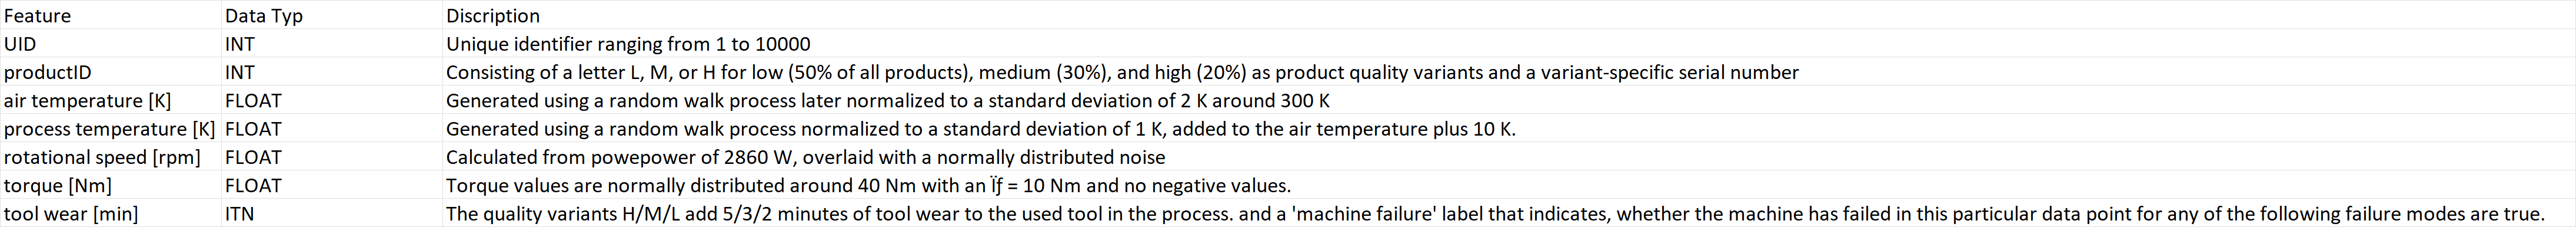


Questions to ask:
1. What is the distribution of air temperature as it relates to process temprerature in the above data set?
2. What is the relationship of torque to rpm in the above dataset?
3. is there a coralation to torque and toolwear in the above dataset?
4. Is there a relationship between process temperature and tool wear?

In [ ]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pylab import *
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/predictive_maintenance.csv')
print(dataset)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

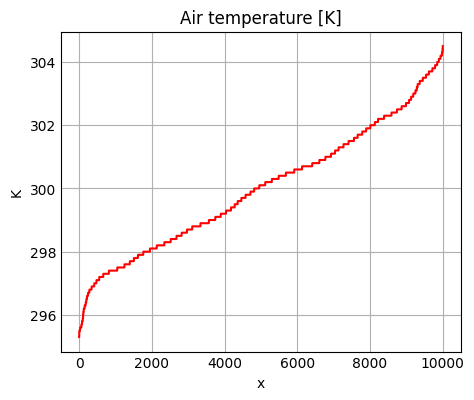

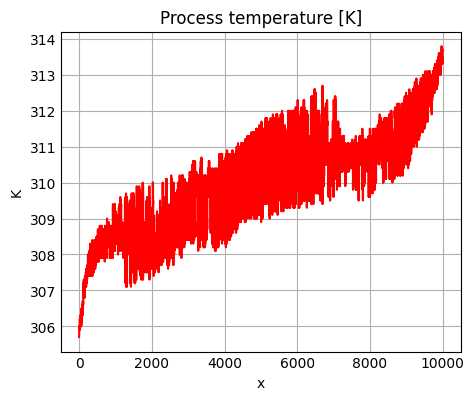

In [ ]:
sorteddataset = dataset.sort_values(by='Air temperature [K]', ascending=True, ignore_index=True)

x = linspace(0, 10000, 10000)
y1 = sorteddataset['Air temperature [K]']
y2 = sorteddataset['Process temperature [K]']

fig1 = plt.figure(1, figsize=(5,4))

# left, bottom, width, height (range 0 to 1)
axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes1.plot(x, y1, 'r')

axes1.set_xlabel('x')
axes1.set_ylabel('K')
axes1.set_title('Air temperature [K]');

fig2 = plt.figure(2, figsize=(5,4))

# left, bottom, width, height (range 0 to 1)
axes2 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])

axes2.plot(x, y2, 'r')

axes2.set_xlabel('x')
axes2.set_ylabel('K')
axes2.set_title('Process temperature [K]');

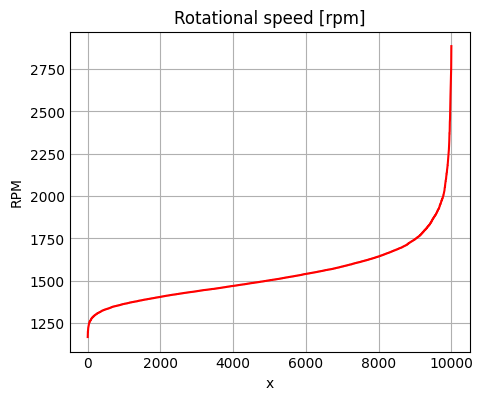

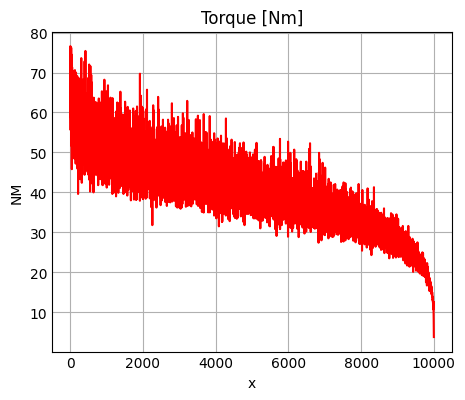

In [ ]:


sorteddataset = dataset.sort_values(by='Rotational speed [rpm]', ascending=True, ignore_index=True)

x = linspace(0, 10000, 10000)
y1 = sorteddataset['Rotational speed [rpm]']
y2 = sorteddataset['Torque [Nm]']

fig1 = plt.figure(1, figsize=(5,4))

# left, bottom, width, height (range 0 to 1)
axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes1.plot(x, y1, 'r')

axes1.set_xlabel('x')
axes1.set_ylabel('RPM')
axes1.set_title('Rotational speed [rpm]');

fig2 = plt.figure(2, figsize=(5,4))

# left, bottom, width, height (range 0 to 1)
axes2 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])

axes2.plot(x, y2, 'r')

axes2.set_xlabel('x')
axes2.set_ylabel('NM')
axes2.set_title('Torque [Nm]');



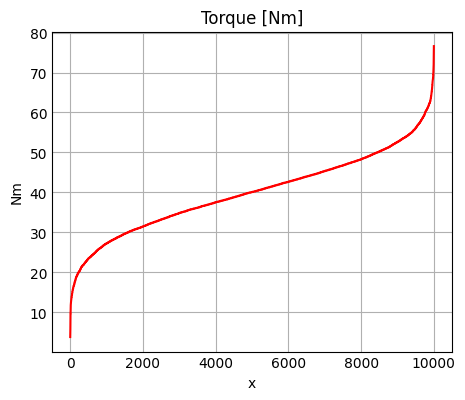

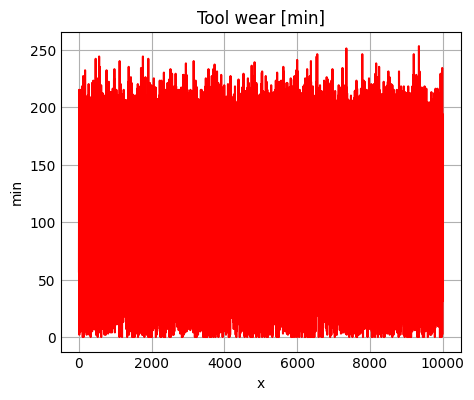

In [ ]:
sorteddataset = dataset.sort_values(by='Torque [Nm]', ascending=True, ignore_index=True)

x = linspace(0, 10000, 10000)
y1 = sorteddataset['Torque [Nm]']
y2 = sorteddataset['Tool wear [min]']

fig1 = plt.figure(1, figsize=(5,4))

# left, bottom, width, height (range 0 to 1)
axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes1.plot(x, y1, 'r')

axes1.set_xlabel('x')
axes1.set_ylabel('Nm')
axes1.set_title('Torque [Nm]');

fig2 = plt.figure(2, figsize=(5,4))

# left, bottom, width, height (range 0 to 1)
axes2 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])

axes2.plot(x, y2, 'r')

axes2.set_xlabel('x')
axes2.set_ylabel('min')
axes2.set_title('Tool wear [min]');

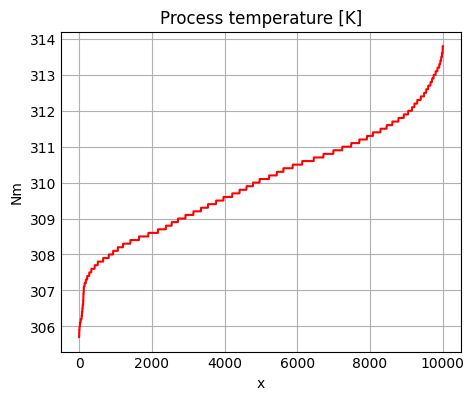

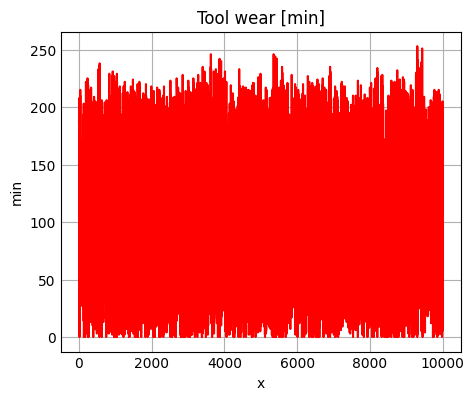

In [ ]:
sorteddataset = dataset.sort_values(by='Process temperature [K]', ascending=True, ignore_index=True)

x = linspace(0, 10000, 10000)
y1 = sorteddataset['Process temperature [K]']
y2 = sorteddataset['Tool wear [min]']

fig1 = plt.figure(1, figsize=(5,4))

# left, bottom, width, height (range 0 to 1)
axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes1.plot(x, y1, 'r')

axes1.set_xlabel('x')
axes1.set_ylabel('Nm')
axes1.set_title('Process temperature [K]');

fig2 = plt.figure(2, figsize=(5,4))

# left, bottom, width, height (range 0 to 1)
axes2 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])

axes2.plot(x, y2, 'r')

axes2.set_xlabel('x')
axes2.set_ylabel('min')
axes2.set_title('Tool wear [min]');

Questions to ask: ==> Answers:

1. What is the distribution of air temperature as it relates to process temprerature in the above data set?
  
  Air temperature and process temperature are clearly corralated.
2. What is the relationship of torque to rpm in the above dataset? 

Torque goes down as RPM goes up. This is normal for many engines.
3. Is there a coralation to torque and toolwear in the above dataset?
  
  There is not an obvious corralation here.
4. Is there a relationship between process temperature and tool wear?
  
  There is not an obvious corralation here.


# DATA SCIENCE TASKS

# Feature Engineering

Much of this data set is rather ideal being made of actual numbers throughout. The "tool wear" date at first glance seems to be made of noise, however. The "type" date will need to be enumerated.

# Train and Test Split

Will use a 40/50 split of random ID data with a 10% holdout. There is over a 97% no fail rate which will be a challenge.

# Establish a Pipeline

As this data is by nature numeric not much will be needed aside from the "type" date to be converted from LMH to 123.

# Fitting and Evaluation

1. The tool wear features and the quality features are very poorly corralated.
2. The target column of the date set has a ~97% "No Fail". This is going to pose a challenge because it will make it difficult to make a random subset of data with a significant amount of actual "Fail" cases. 